![TUM Physik logo](./content/tumphysik.png)
## Übungen zur Experimentalphysik 1
### Blatt 2
Author: Philipp Gadow (philipp@pgadow.de)

In [28]:
# Vorbereitung: importiere python packages
import math
import numpy as np
from sympy import * 
import matplotlib.pyplot as plt
from ipywidgets import interact
%matplotlib inline

### Aufgabe 1
Eine kleine Kugel wird zum Zeitpunkt $t= 0 \,\text{s}$ mit der Anfangsgeschwindigkeit $v_0= 30 \,\text{m} \text{s}^{-1}$ unter dem Winkel $\beta= 60^{\circ}$ gegen die Horizontale abgeschossen. Rechnen Sie für die Zahlenrechnungen vereinfachend mit $g=10 \,\text{m} \text{s}^{-2}$ .

a) Ermitteln Sie die Gleichung $x(t)$ und $y(t)$ und bestimmen Sie $y(x)$ der Wurfparabel.

**Lösung:**

Die Bewegungsgleichung lautet $\vec{a}(t) = \begin{pmatrix}\ddot x(t) \\ \ddot y(t) \end{pmatrix} = \begin{pmatrix} 0 \\ -g \end{pmatrix}$. Indem wir diese Gleichung einmal nach der Zeit integrieren, können wir die Geschwindigkeit des Körpers $\vec{v}(t) = \begin{pmatrix}\dot x(t) \\ \dot y(t) \end{pmatrix} = \begin{pmatrix} v_{0,x} \\ -g\,t + v_{0,y} \end{pmatrix} = \begin{pmatrix} v_{0} \cos \beta \\ -g\,t + v_{0} \sin \beta \end{pmatrix}$ angeben.

Noch einmal nach der Zeit integrieren liefert nun endlich die Bahnkurve der Kugel:
$ x(t) = v_0 \cos \beta \,t$
$ y(t) = -\frac{g}{2}g\,t^2 + v_0 \sin \beta \,t$.

Wenn wir nun die Gleichung für $x(t)$ nach t umstellen, auflösen und in die zweite Gleichung einsetzen, erhalten wir so die Wurfparable: Setze nun $t(x) = \frac{x}{v_0 \cos \beta}$ in Gleichung 2 ein, dann erhalten wir
$y(x) = -\frac{g}{2v_0^2 \cos^2 \beta} x^2 + \tan \beta x$.

An dieser Gleichung können wir einiges über das Flugverhalten des Balles ablesen. Der lineare Term in der Parabel wird vor allem für kleine Werte von $x$ dominieren. Das bedeutet, das zu Beginn des Wurfs die Bewegung annähernd einer Geraden mit Steigung $m = \tan \alpha$ folgt, später aber von dem quadratischen Term dominiert wird und somit das Vorzeichen der Steigung ändert.

Nun machen wir noch eine Skizze der Wurfparabel und der separaten Bewegungskomponenten:

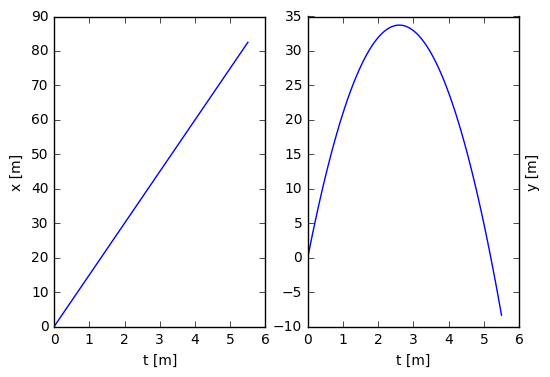

In [27]:
g = 10 #m/s**2
beta = 60 * math.pi/180
v0 = 30 #m/s

# Komponenten der Bahnkurve
def r_x(t):
    return v0 * math.cos(beta)*t
def r_y(t):
    return -0.5*g*t**2 + v0 * math.sin(beta)*t

# Wurfparabel
def parabola(x):
    return -g/(2 * v0**2 *(math.cos(beta))**2) * x**2 + math.tan(beta) * x

# Variables
x = np.arange(0, 100)
t = np.linspace(0,5.5,100)

# Zeichne x-Bewegung
plt.subplot(121)
plt.xlabel('t [m]')
plt.ylabel('x [m]')
plt.plot(t, r_x(t))
# Zeichne y-Bewegung
plt.subplot(122).yaxis.set_label_position("right")
plt.xlabel('t [m]')
plt.ylabel('y [m]')
plt.plot(t, r_y(t))
plt.show()

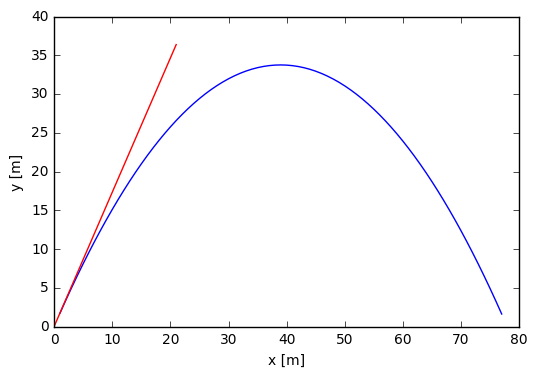

In [25]:
# Zeichen Parabel für positive x-Werte
plt.figure(2)
plt.plot(x[parabola(x)>0], parabola(x)[parabola(x)>0])
plt.xlabel('x [m]')
plt.ylabel('y [m]')
# Zeichne Gerade mit Steigung m = tan beta bis Differenz zu Parabel größer als 10 m
plt.plot(x[math.tan(beta)*x - parabola(x)<10], math.tan(beta)*x[math.tan(beta)*x - parabola(x)<10], 'r')
plt.show()

b) Berechnen Sie den Vektor $\vec{v}_1$ der Geschwindigkeit zum Zeitpunkt $t_1=2\,\text{s}$. Geben Sie Betrag und Winkel zur x-Achse an.

**Lösung:**
Die Geschwindigkeit des Körpers ist $\begin{pmatrix}v_x(t) \\ v_y(t) \end{pmatrix} = \begin{pmatrix} v_{0} \cos \beta \\ -g\,t + v_{0} \sin \beta \end{pmatrix}$. Ausgewertet zum Zeitpunkt $t_0=2$ betragen die Geschwindigkeit und Winkel der Geschwindigkeit zur $x$-Achse

In [3]:
def v(t):
    return np.array([v0*math.cos(beta), -g*t+v0*math.sin(beta)])

print("Betrag der Geschwindigkeit bei t=2s: {:.2f} m/s".format(np.linalg.norm(v(2))))
print("Winkel zur x-Achse bei t=2s: {:.2f}".format(math.atan(v(2)[1]/v(2)[0])*180/math.pi))

Betrag der Geschwindigkeit bei t=2s: 16.15 m/s
Winkel zur x-Achse bei t=2s: 21.74


c) Welche Ortskoordinaten $\vec{r}_\text{S}$ hat der Scheitelpunkt?

**Lösung:**
Der Scheitelpunkt befindet sich an der Stelle, wo die vertikale Richtung der Bewegung einen Vorzeichenwechsel vollführt und aus der Steig- eine Sinkbewegung wird, also an der Stelle, wo $v_y = 0$ wird. Dies ist der Fall für $t_s  = \frac{v_0 \sin \beta}{g}$. Die Koordinaten sind:

In [6]:
# Zeitpunkt der Scheitelpunktdurchquerung nach Wurfbeginn
t_s = v0*math.sin(beta)/g
print("t_s = {:.2f} s".format(t_s))
# Koordinaten des Scheitelpunkts
print("Koordinaten des Scheitelpunktes: P:({:.2f} m, {:.2f} m)".format(r_x(t_s), r_y(t_s)))

t_s = 2.60 s
Koordinaten des Scheitelpunktes: P:(38.97 m, 33.75 m)


d) Welchen Krümmungsradius $R_\text{S}$ hat die Wurfparabel im Scheitelpunkt?

**Lösung:**
Der Krümmungsrdius ist durch erste und zweite Ableitungen von $x(t)$ und $y(t)$ gegeben
$$ r(t) = \left|\frac{(x'^2(t) + y'^2(t))^{\frac{3}{2}}}{x'(t) \cdot y''(t) - x''(t) \cdot y'(t)} \right| . $$

Ausgewertet am Scheitelpunkt bei $t_s = 2\,\text{s}$ ist $y'(t_s) = 0$, sodass der Krümmungsradius am Scheitelpunkt folgenden Wert hat:

In [8]:
def kruemmungsradius(xp,xpp, yp, ypp):
    return abs(((xp**2 + yp**2)**1.5)/(xp * ypp - xpp *yp))

xp = v0 * math.cos(beta)
yp = 0
xpp = 0
ypp = g
print("r_s = {:.2f} m".format(kruemmungsradius(xp,xpp,yp,ypp)))

r_s = 22.50 m


### Aufgabe 2
Finden Sie den Abschusswinkel zur Horizontalen $\alpha$ eines Projektils, dessen Reichweite zweimal so groß wie seine maximale Höhe ist. Der Luftwiderstand ist zu vernachlässigen.

**Lösung:**
Die Bewegungsgleichung lautet 

$$ \ddot{x} = 0 $$
$$ \ddot{y} = -g $$

und die Bahnkurve ist (nach zweifacher Integration der Bewegungsgleichung)
$$\vec{r} (t) = \begin{pmatrix} v_0 \cos \alpha \\ - \frac{g}{2} t^2 +  v_0 \sin \alpha \end{pmatrix} $$

Bestimme maximale Höhe: 

In [70]:
# Definiere Variablen und Konstanten:
g = 10 # m/s**2
t, v0, alpha = symbols('t v0 alpha')
x = v0 * cos(alpha) * t
y = -g*(t**2)/2. + v0 * sin(alpha) * t
# Bestimme maximale Höhe:
yp = diff(y, t)
print("y'(t) = {}".format(yp))
t_ymax=solve(Eq(yp,t))
print(t_ymax)

# Bestimme maximale Reichweite:
t_xmax=solve(Eq(y,t))
print(t_xmax)



y'(t) = -10.0*t + v0*sin(alpha)
[{t: 0.0909090909090909*v0*sin(alpha)}]
[{t: 0.0}, {v0: (5.0*t + 1.0)/sin(alpha)}]


### Aufgabe 3
Ein Stein fällt in einen Brunnen. Seine Anfangsgeschwindigkeit ist Null. Ein Zeitintervall $\Delta t=1\,\text{s}$ nach dem Beginn des freien Falls wird eine zweiter Stein mit der Anfangsgeschwindigkeit  $v_{z0}=20\,\text{m}\text{s}^{-1}$ hinterhergeworfen. Der Luftwiderstand bleibt unberücksichtigt. Verwenden Sie $g=10\,\text{m}\text{s}^{-2}$.

a) Berechnen Sie die Zeit $t_1$, die nach Bewegungsbeginn des ersten Steines vergeht, bis dieser vom zweiten Stein überholt wird.

**Lösung:**

In [69]:
# Definiere Variablen und Konstanten
v0 = 20 # m/s
g = 10 # m/s**2
delta_t = 1 # s
t, z1, z2 = symbols('t z1 z2')

# Setze Ortskurve des ersten Steins mit der des zweiten Steins gleich
z1 = -0.5*g*t**2
z2 = -0.5*g*(t - delta_t)**2 - v0*(t - delta_t)
# Löse die Gleichung für die t
solution = solveset(Eq(z1,z2))
t_1 = next(iter(solution))
print("t1 = {:.2f} s".format(t_1))

t1 = 1.50 s


b) In welcher Tiefe $z_1$ findet der Überholvorgang statt?

**Lösung:**

In [52]:
z_1 = z1.subs(t, t_1)
print("z1 = {:.2f} m".format(z_1))
z_1 = z2.subs(t, t_1)
print("z1 = {:.2f} m".format(z_1))

z1 = -11.25 m
z1 = -11.25 m


### Aufgabe 4
Ein Wurfgeschoss wird am Fuße eines Hügels abgefeuert. Der Hügel steigt mit einem Winkel $\beta$ gegenüber der Horizontalen. Finden Sie den Winkel, mit dem das Geschoss gegen die Horizontale in Richtung des Berges abgefeuert werden sollte, um seine größtmögliche Reichweite zu erzielen.

*Hinweis:* $-\frac{1}{\tan(\phi)}=\tan(\phi-\frac{\pi}{2}+n\pi)$

**Lösung:**
Die Bahnkurve ist komponentenweise gegeben durch 

$r_x(t) = v_0 \cos \alpha \, t$

$r_y(t) = - \frac{g}{2} t^2 + v_0 \sin \alpha \, t$

Wir bestimmen zunächst die maximale Reichweite. Statt wie beim schiefen Wurf auf einer ebenen Fläche gilt für die maximale Reichweite nicht $r_y(t_{\text{max}}) = 0$, sondern $r_y(t_{\text{max}}) = h(t_{\text{max}}) = r_x(t_{\text{max}}) \tan \beta$, da der Hügel an der Stelle die Höhe $ h (t) = r_x(t) \tan \beta$ hat.

Setzen wir $r_x$ und $r_y$ in diese Bedingung ein, erhalten wir
$$ - \frac{g}{2} t_{\text{max}} + v_0 \sin \alpha t_{\text{max}} = \tan \beta v_0 \cos \alpha t_{\text{max}}$$

Da für die maximale Reichweite $t_{\text{max}} > 0$ sinnvoll ist, können wir durch $t_{\text{max}}$ teilen, umstellen und erhalten so
$$t_{\text{max}} = \frac{2 v_0}{g} \, (-\tan \beta \cos \alpha + \sin \alpha).$$

Somit ist die maximale Reichweite

$$x(t_{\text{max}}) = \frac{2\,v_0^2}{g}(\cos \alpha \sin \alpha - \tan \beta \cos^2 \alpha)$$.

Um den Wert von $\alpha$ zu finden, für den dieser Ausdruck maximal wird, leiten wir ihn ab und setzen ihn gleich null.

$$\frac{\text{d}x}{\text{d}\alpha} = 0 \Rightarrow 0 = - \sin^2 \alpha + \cos^2 \alpha + 2 \tan \beta \cos \alpha \ sin \alpha$$

Mit einigem Umformen kommen wir auf
$$\tan \alpha = - \frac{1}{\tan \beta}

und mit dem Hinweis aus der Aufgabenstellung formen wir dies um zu

$$\tan (2 \alpha) = \tan(\beta - \frac{\pi}{2} + n \pi)$$,

was gleichbedeutend ist mit 

$$2 \alpha = \beta - \frac{\pi}{2} + n \pi$$.

Wegen des Definitionsbereichs des Tangens kommt für $n$ nur $n= 1$ in Frage, sodass schliesslich $\alpha = \frac{\beta}{2} + \frac{\pi}{4}$ unser Ergebnis ist.

### Aufgabe 5
Ein Zug fährt mit konstanter Tangentialbeschleunigung auf einem Kreisbogen mit dem Radius $r=2\,\text{km}$. Dabei legt er die Strecke $\Delta s=1200\,\text{m}$ zurück. Zu Beginn der betrachteten Bewegung hat er die Geschwindigkeit $v_{1}=30\,\text{km/h}$ und am Ende $v_{2}=100\,\text{km/h}$.

a) Wie lange dauert der Beschleunigungsvorgang?

**Lösung:**

In [71]:
# Definiere Konstanten und Variablen

b) Wie groß ist die Tangentialbeschleunigung?

**Lösung:**

c) Berechnen Sie die Winkelbeschleunigung.

**Lösung:**

d) Wie groß ist die Zentripetalbeschleunigung zu Beginn und am Ende des Vorgangs?

**Lösung:**

### Aufgabe 6
Ein Auto fährt geradlinig mit der Geschwindigkeit $v_0=96\,\text{km/h}$ auf der Autobahn. Die Räder haben den Durchmesser $d=2r_2=58\,\text{cm}$.

a) Welche Radialbeschleunigung $a_r$ hat die Ventilkappe das Rades, die sich im Abstand $r_1=14,5\,\text{cm}$ von der Achse befindet?

**Lösung:**

b) In welcher Zeit $t_1$ ändert sich die Richtung der Tangentialgeschwindigkeit dieser Kappe um den Winkel $\varphi_1=60^{\circ}$? (Hierbei soll die Drehung um die mitbewegte Achse des Rades betrachtet werden.)

**Lösung:**

c) Angenommen, die Ventilkappe löse sich gerade beim Durchgang im oberen Punkt. In welcher Richtung würde sie sich unmittelbar nach dem Lösen bewegen und wie groß wäre die Geschwindigkeit $v_K$?

**Lösung:**

### Mathematische Ergänzungen
Der Tangens ist definiert durch
$$\tan z = \frac{\sin z}{\cos z}\text.$$

a) Bestimmen Sie unter Verwendung der bekannten Ableitungen von $\cos z$ und $\sin z$ die Ableitungen von $\tan z$.

**Lösung:**

In [16]:
z = symbols('z')

print("Ableitung von sin(z): {}".format(diff(sin(z))))
print("Ableitung von cos(z): {}".format(diff(cos(z))))
print("Ableitung von tan(z): {}".format(diff(tan(z))))
print("Zweite Ableitung von tan(z): {}".format(diff(tan(z)**2 + 1)))

Ableitung von sin(z): cos(z)
Ableitung von cos(z): -sin(z)
Ableitung von tan(z): tan(z)**2 + 1
Zweite Ableitung von tan(z): (2*tan(z)**2 + 2)*tan(z)


b) Geben Sie einen Definitionsbereich an, in dem $\tan z$ umkehrbar ist und bestimmen Sie die Ableitung der Umkehrfunktion Arcustangens $\arctan z$.

**Lösung:**
Der Arkustangens ist umkehrbar im Intervall $[-\frac{\pi}{2}, \frac{\pi}{2})$.

Die [Ableitung der Umkehrfunktion](https://de.serlo.org/mathe/funktionen/ableitung-funktionen/ableitung-allgemein/ableitung-umkehrfunktion) vom Tangens ist $f^{-1}(x) = \frac{1}{f'(f^{-1}(x))}$, also 
$$\frac{\text{d}}{\text{d}x}\text{tan}^{-1}(x) = \frac{1}{1 + x^2}$$.

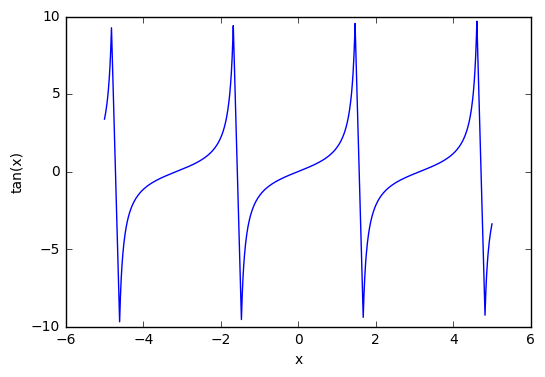

In [23]:
# Variables
x = np.linspace(-5, 5,1000)

# Zeichne Tan
plt.xlabel('x')
plt.ylabel('tan(x)')
plt.plot(x[abs(np.tan(x)) < 10], np.tan(x)[abs(np.tan(x)) < 10])

plt.show()